In [1]:
import carbonbench

import numpy as np
import pandas as pd

In [2]:
import importlib
import carbonbench
importlib.reload(carbonbench)

<module 'carbonbench' from '/users/4/rozan012/CarbonBench/carbonbench/__init__.py'>

# Process Targets

In [3]:
# 1 Process targets
# 1.1 Load targets
targets = ['GPP_NT_VUT_USTAR50', 'RECO_NT_VUT_USTAR50', 'NEE_VUT_USTAR50']
include_qc = True
y = carbonbench.load_targets(targets, include_qc)
y

,date,site,lat,lon,IGBP,Koppen,GPP_NT_VUT_USTAR50,RECO_NT_VUT_USTAR50,NEE_VUT_USTAR50,NEE_VUT_USTAR50_QC
0,2009-01-01,FLX_AR-SLu,-33.464800,-66.459800,MF,B,8.989840,2.957700,-6.032130,0.0
1,2009-01-02,FLX_AR-SLu,-33.464800,-66.459800,MF,B,8.912250,2.977330,-5.934920,0.0
2,2009-01-03,FLX_AR-SLu,-33.464800,-66.459800,MF,B,9.356500,3.330460,-6.026040,0.0
3,2009-01-04,FLX_AR-SLu,-33.464800,-66.459800,MF,B,9.826600,3.794460,-6.032130,0.0
4,2009-01-05,FLX_AR-SLu,-33.464800,-66.459800,MF,B,9.727970,3.793040,-5.934920,0.0
...,...,...,...,...,...,...,...,...,...,...
1435909,2023-12-27,JPX_JP-Tmd,42.735911,141.523147,DBF,D,1.013866,0.617556,-0.396310,0.0
1435910,2023-12-28,JPX_JP-Tmd,42.735911,141.523147,DBF,D,0.738017,0.734304,-0.003712,0.0
1435911,2023-12-29,JPX_JP-Tmd,42.735911,141.523147,DBF,D,0.744890,0.765398,0.020508,0.0
1435912,2023-12-30,JPX_JP-Tmd,42.735911,141.523147,DBF,D,0.470808,0.907578,0.436770,0.0


In [3]:
# 1.2 Explore targets
print(f"Total number of sites: {y.site.nunique()}")
print(f"Total number of samples: {len(y)}, QC∈[0,1]")
if include_qc:
    print(f"Total number of top-quality samples: {len(y[y.NEE_VUT_USTAR50_QC==1])}, QC=1")

Total number of sites: 569
Total number of samples: 1343732, QC∈[0,1]
Total number of top-quality samples: 570433, QC=1


Train: 440, Test: 129

Koppen balance:
        overall  test
Koppen               
A            19     4
B            55    13
C           196    46
D           284    61
E            15     5


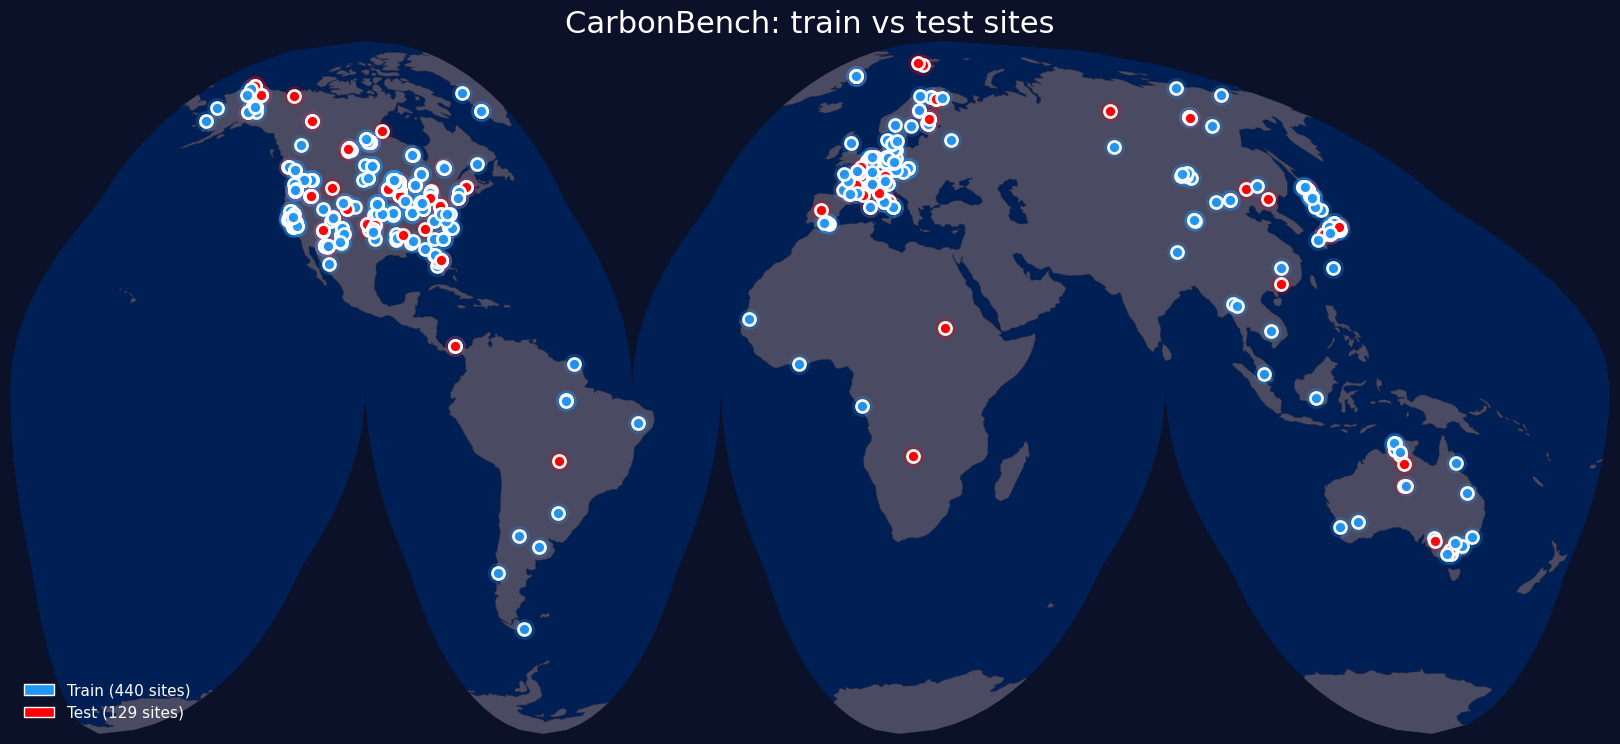

In [3]:
# 1.3 Split targets on train and test
y_train, y_test = carbonbench.split_targets(y, verbose=True, plot=True)

# Process Features

## MOD09GA

In [2]:
modis = carbonbench.load_modis()
modis

,site,date,sur_refl_b01,sur_refl_b02,sur_refl_b03,sur_refl_b04,sur_refl_b05,sur_refl_b06,sur_refl_b07,SensorZenith,SensorAzimuth,SolarZenith,SolarAzimuth,clouds
0,AMF_US-LS2,2000-02-24,0.613278,0.615670,0.602804,0.604110,0.554230,0.283238,0.156970,9.386184,-79.039375,43.821296,156.984799,1.000000
1,AMF_US-LS2,2000-02-25,0.136111,0.202526,0.068453,0.097170,0.262865,0.269524,0.195073,63.403740,-73.862170,41.007709,172.133518,0.000000
2,AMF_US-LS2,2000-02-26,0.198556,0.274010,0.106419,0.148969,0.336809,0.317314,0.226733,15.836840,100.399168,44.201395,152.683881,0.393236
3,AMF_US-LS2,2000-02-27,0.141464,0.206640,0.070379,0.101384,0.263974,0.266153,0.193892,54.245268,-75.731891,40.708107,167.582859,0.000000
4,AMF_US-LS2,2000-02-29,0.320863,0.382763,0.260131,0.282804,0.443713,0.440773,0.340389,41.004591,-77.339869,40.611928,162.978168,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4826905,AMF_US-CF1,2023-12-27,0.590641,0.584977,0.602861,0.599325,0.537534,0.326662,0.192701,3.515582,-83.306778,72.846355,158.960682,1.000000
4826906,AMF_US-CF1,2023-12-28,0.186509,0.276135,0.157524,0.160219,0.323944,0.304203,0.183383,53.093113,-70.502011,70.882666,168.354173,0.936743
4826907,AMF_US-CF1,2023-12-29,0.070935,0.109091,0.038330,0.061296,0.137532,0.132033,0.076730,23.913874,99.432278,73.947964,154.835666,0.032123
4826908,AMF_US-CF1,2023-12-30,0.109085,0.137061,0.081222,0.094353,0.147998,0.118823,0.069033,37.797539,-73.741952,71.488525,164.088898,0.000247


In [ ]:
era_feature_set = 'minimal' # minimal (6), stanard (36), full (150)
era = carbonbench.load_era(era_feature_set)
era